      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

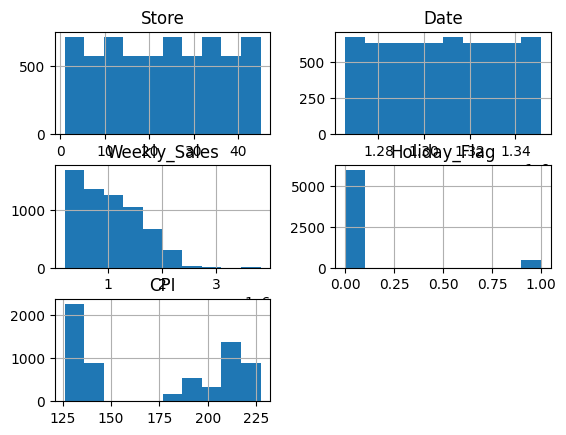

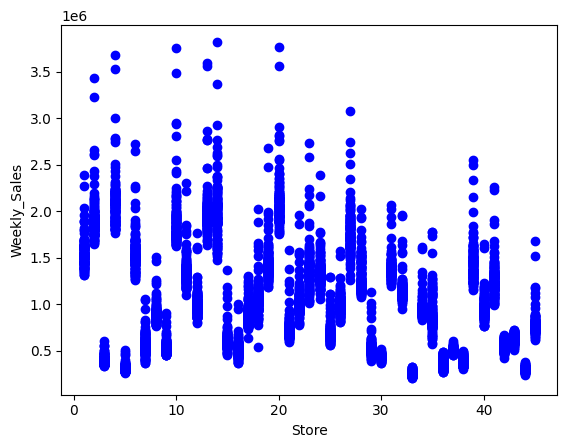

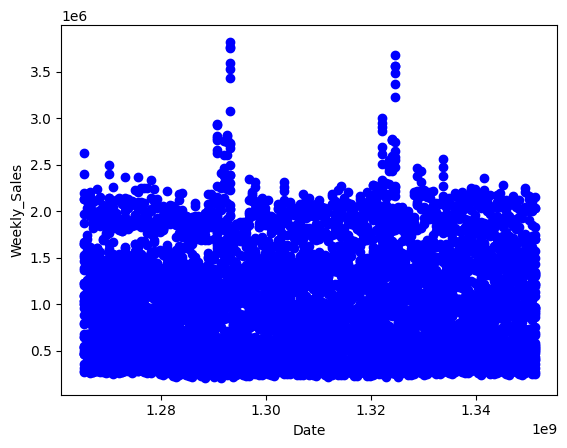

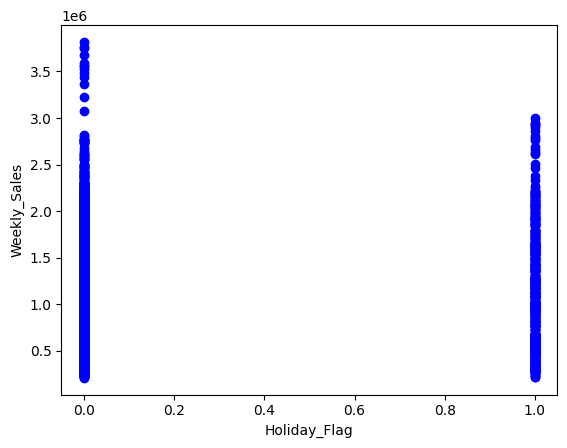

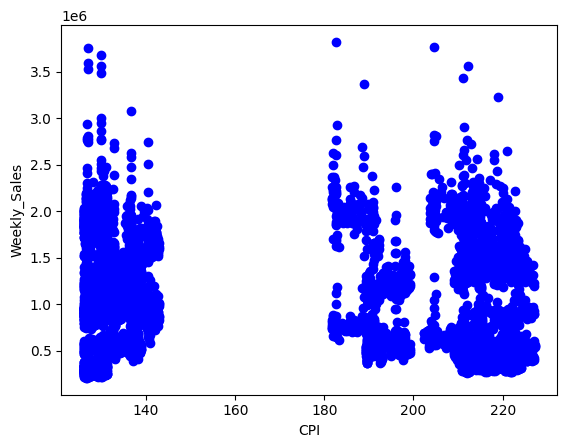

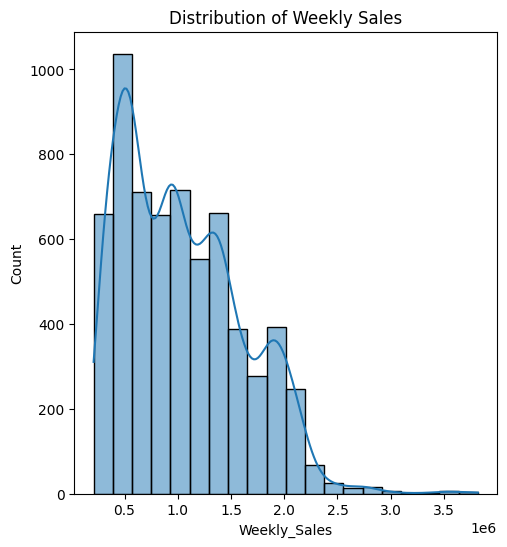

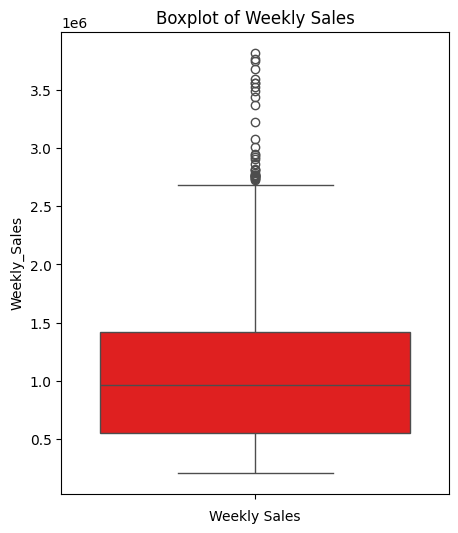

Mean Squared Error: 276332027153.38104
Root Mean Squared Error (RMSE): 525672.927925132
Mean Absolute Error (MAE): 435381.3472060609
R-squared (R2 Score): 0.14223774085724694
Coefficients: [ 1.17512737e-03 -1.57052085e+04 -5.63012490e+04 -2.23622064e+03]
Intercept: 443546.29660812125


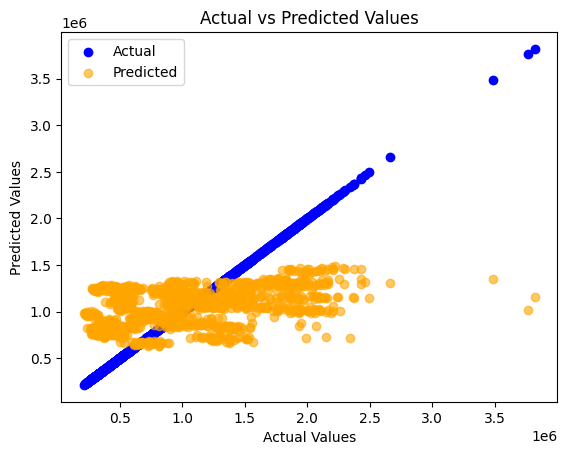

In [4]:
# Dataset link: https://www.kaggle.com/datasets/mikhail1681/walmart-sales
# Notebook link: https://www.kaggle.com/code/krupadharamshi/linear-regression-kdp
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load Data
df = pd.read_csv("/Walmart_Sales.csv")

# Read Data
print(df)  # Reading the data
print(df.head(5))  # Reading the first 5 rows of data
print(df.tail(5))  # Reading the last 5 rows of data

# Data Pre-processing and EDA

# Info about data
df.info()  # Info about data
print(df.describe())  # Statistical description of data

# Checking for null values
print(df.isnull().sum())

# Convert 'Date' column to numerical representation (example assuming 'Date' column is in string format)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', dayfirst=True)
df['Date'] = df['Date'].astype(int) / 10**9  # Converting datetime to seconds

# Check data types and column names
df.info()
print(df.columns)

# Select relevant columns for analysis
ndf = df[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'CPI']]
print(ndf.head())

# Visualization

# Histogram
viz = ndf[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'CPI']]
viz.hist()
plt.show()

# Scatter plot
for i in ['Store', 'Date', 'Holiday_Flag', 'CPI']:
    plt.scatter(ndf[i], ndf['Weekly_Sales'], color='blue')
    plt.xlabel(i)
    plt.ylabel("Weekly_Sales")
    plt.show()

# Histogram of Weekly Sales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(ndf['Weekly_Sales'], bins=20, kde=True)
plt.title('Distribution of Weekly Sales')

# Boxplot of Weekly Sales
plt.figure(figsize=(5, 6))
sns.boxplot(ndf['Weekly_Sales'], color='red')
plt.title('Boxplot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.show()

# Prepare the Data
X = df[['Date', 'Store', 'Fuel_Price', 'CPI']]  # Features
y = df['Weekly_Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Prediction
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2 Score):", r2)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Visualize the Results
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred, color='orange', label='Predicted', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()